In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,426 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

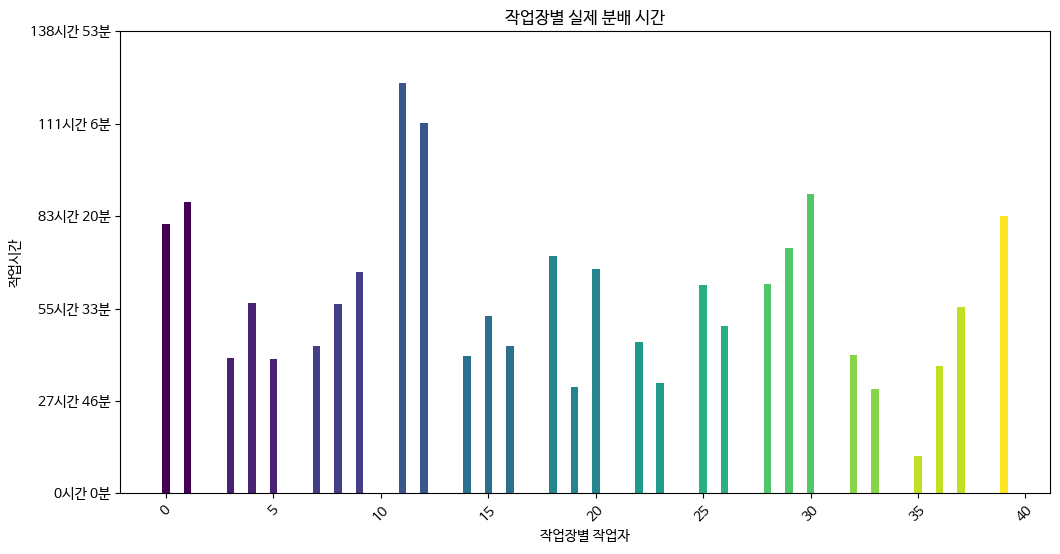

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터 로드
file_path = '/content/result.csv'
df_predicted = pd.read_csv(file_path)

# 작업 시간 계산
df_predicted['total_work_time'] = df_predicted['Y1_Predicted'] + df_predicted['Y2_Predicted']

# X7 값에 따라 그룹화 및 작업 시간 계산
grouped = df_predicted.groupby(['X7', 'X8'])['total_work_time'].sum().reset_index()

# X7 값에 따른 색상 팔레트 정의
unique_x7_values = df_predicted['X7'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_x7_values)))

# 그래프 준비
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

bar_width = 0.35
index = 0

# 각 X7 값에 대한 바 차트 그리기
for x7_value in unique_x7_values:
    subset = grouped[grouped['X7'] == x7_value]
    workers = subset['X8']
    work_times = subset['total_work_time']

    x_positions = np.arange(len(workers)) + index
    plt.bar(x_positions, work_times, bar_width, color=colors[list(unique_x7_values).index(x7_value)], label=f'X7: {x7_value}')

    index += len(workers) + 1  # 다음 그룹을 위한 인덱스 업데이트

# 그래프 설정
# 작업시간을 시간:분 형태로 변환하는 함수
def seconds_to_hour_min(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return f"{int(hours)}시간 {int(minutes)}분"

plt.yticks(plt.yticks()[0], [seconds_to_hour_min(y) for y in plt.yticks()[0]])

plt.xlabel('작업장별 작업자')
plt.ylabel('작업시간')
plt.title('작업장별 실제 분배 시간')
plt.xticks(rotation=45)

# 그래프 표시
plt.show()


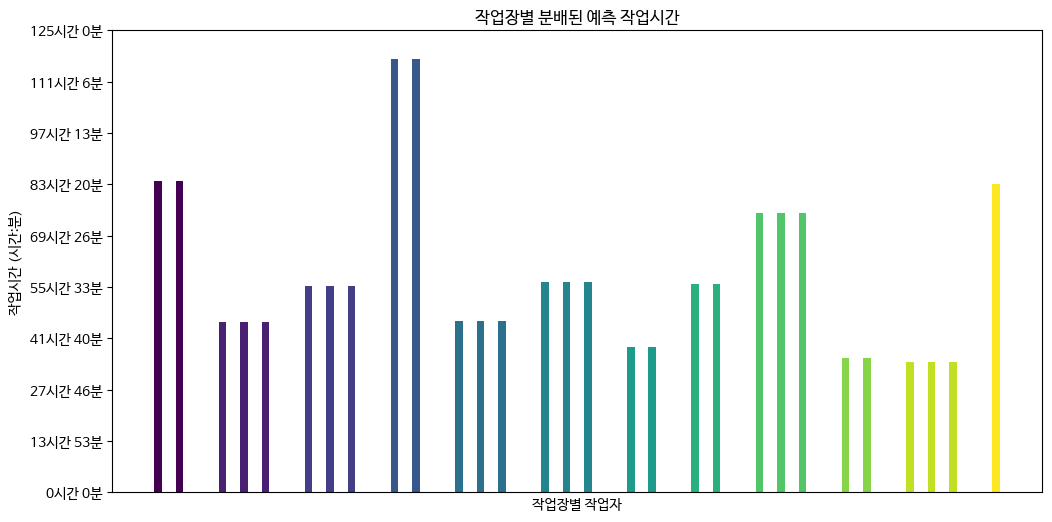

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='NanumBarunGothic')

file_path = '/content/result.csv'
df_predicted = pd.read_csv(file_path)

def initialize_workloads(workers):
    return {worker: 0 for worker in workers}

def min_max_allocation(tasks, workers):
    workloads = initialize_workloads(workers)
    task_assignments = {worker: [] for worker in workers}
    for task in tasks:
        min_worker = min(workloads, key=workloads.get)
        task_assignments[min_worker].append(task)
        workloads[min_worker] += task
    return task_assignments, workloads

unique_x7_values = df_predicted['X7'].unique()
assignments_by_x7 = {}
workloads_by_x7 = {}

for value in unique_x7_values:
    subset_df = df_predicted[df_predicted['X7'] == value]
    total_work_time = subset_df['Y1_Predicted'] + subset_df['Y2_Predicted']
    total_work_time.sort_values(ascending=False, inplace=True)

    tasks = total_work_time.tolist()
    workers = subset_df['X8'].unique()

    assignments, workloads = min_max_allocation(tasks, workers)
    assignments_by_x7[value] = assignments
    workloads_by_x7[value] = workloads

# 초를 시간과 분으로 변환하는 함수
def seconds_to_hour_min(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return f"{int(hours)}시간 {int(minutes)}분"

colors = plt.cm.viridis(np.linspace(0, 1, len(assignments_by_x7)))

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

bar_width = 0.35
index = 0
x_labels = []

for i, (x7_value, assignments) in enumerate(assignments_by_x7.items()):
    workloads = {worker: sum(tasks) for worker, tasks in assignments.items()}
    workers = list(workloads.keys())
    workload_values = list(workloads.values())

    x_positions = np.arange(len(workers)) + index
    plt.bar(x_positions, workload_values, bar_width, color=colors[i], label=f'X7: {x7_value}')

    #x_labels.extend([f'{x7_value}-{worker}' for worker in workers])

    index += len(workers) + 1

# y축 눈금 레이블을 '시간:분' 형식으로 설정
plt.yticks(plt.yticks()[0], [seconds_to_hour_min(y) for y in plt.yticks()[0]])

plt.xlabel('작업장별 작업자')
plt.ylabel('작업시간 (시간:분)')
plt.title('작업장별 분배된 예측 작업시간')
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45)
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/result.csv'
df_day_sample = pd.read_csv(file_path)

# 각 X7 값의 1% 데이터 추출
sampled_df_day_sample = pd.DataFrame()

for value in df_day_sample['X7'].unique():
    subset_df = df_day_sample[df_day_sample['X7'] == value]
    sampled_subset_df = subset_df.sample(frac=0.08)  # 1% 샘플링
    sampled_df_day_sample = pd.concat([sampled_df_day_sample, sampled_subset_df])

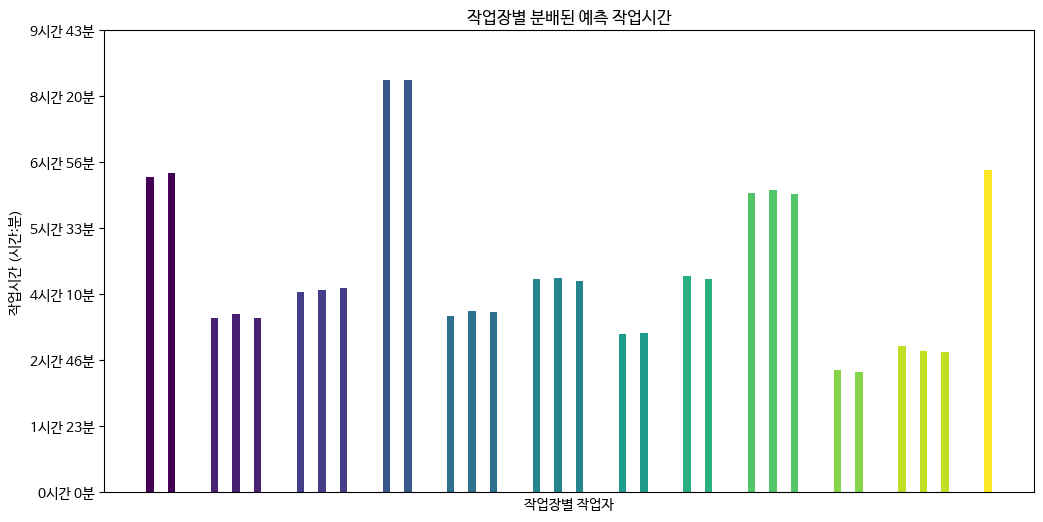

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='NanumBarunGothic')

# file_path = '/content/result.csv'
# sampled_df_day_sample = pd.read_csv(file_path)

def initialize_workloads(workers):
    return {worker: 0 for worker in workers}

def min_max_allocation(tasks, workers):
    workloads = initialize_workloads(workers)
    task_assignments = {worker: [] for worker in workers}
    for task in tasks:
        min_worker = min(workloads, key=workloads.get)
        task_assignments[min_worker].append(task)
        workloads[min_worker] += task
    return task_assignments, workloads

unique_x7_values = sampled_df_day_sample['X7'].unique()
assignments_by_x7 = {}
workloads_by_x7 = {}

for value in unique_x7_values:
    subset_df = sampled_df_day_sample[sampled_df_day_sample['X7'] == value]
    total_work_time = subset_df['Y1_Predicted'] + subset_df['Y2_Predicted']
    total_work_time.sort_values(ascending=False, inplace=True)

    tasks = total_work_time.tolist()
    workers = subset_df['X8'].unique()

    assignments, workloads = min_max_allocation(tasks, workers)
    assignments_by_x7[value] = assignments
    workloads_by_x7[value] = workloads

# 초를 시간과 분으로 변환하는 함수
def seconds_to_hour_min(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return f"{int(hours)}시간 {int(minutes)}분"

colors = plt.cm.viridis(np.linspace(0, 1, len(assignments_by_x7)))

plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

bar_width = 0.35
index = 0
x_labels = []

for i, (x7_value, assignments) in enumerate(assignments_by_x7.items()):
    workloads = {worker: sum(tasks) for worker, tasks in assignments.items()}
    workers = list(workloads.keys())
    workload_values = list(workloads.values())

    x_positions = np.arange(len(workers)) + index
    plt.bar(x_positions, workload_values, bar_width, color=colors[i], label=f'X7: {x7_value}')

    #x_labels.extend([f'{x7_value}-{worker}' for worker in workers])

    index += len(workers) + 1

# y축 눈금 레이블을 '시간:분' 형식으로 설정
plt.yticks(plt.yticks()[0], [seconds_to_hour_min(y) for y in plt.yticks()[0]])

plt.xlabel('작업장별 작업자')
plt.ylabel('작업시간 (시간:분)')
plt.title('작업장별 분배된 예측 작업시간')
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45)
plt.show()


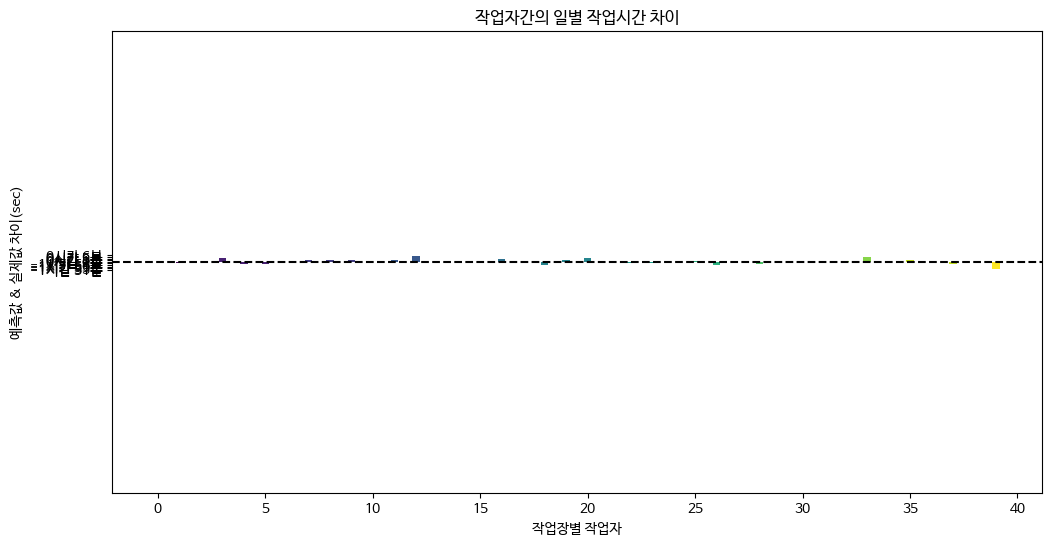

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/result.csv'
df_actual = pd.read_csv(file_path)

# 각 X7 값의 1% 데이터 추출
sampled_df_actual = pd.DataFrame()

for value in df_actual['X7'].unique():
    subset_df = df_actual[df_actual['X7'] == value]
    sampled_subset_df = subset_df.sample(frac=0.08)  # 1% 샘플링
    sampled_df_actual = pd.concat([sampled_df_actual, sampled_subset_df])

# X7 변수에 따라 sampled_df_actual 데이터프레임을 분할하고 min_max_allocation 실행
unique_x7_values = sampled_df_actual['X7'].unique()
assignments_by_x7 = {}
workloads_by_x7 = {}

for value in unique_x7_values:
    subset_df = sampled_df_actual[sampled_df_actual['X7'] == value]
    total_predicted_work_time = subset_df['Y1_Predicted'] + subset_df['Y2_Predicted']
    total_predicted_work_time.sort_values(ascending=False, inplace=True)

    tasks = total_predicted_work_time.index.tolist()  # 작업 인덱스 사용
    workers = subset_df['X8'].unique()

    assignments, workloads = min_max_allocation(tasks, workers)
    assignments_by_x7[value] = assignments
    workloads_by_x7[value] = workloads

# 차이 계산 및 시각화 함수 (sampled_df_actual 사용)
def visualize_total_workload_difference(df, assignments_by_x7):
    plt.figure(figsize=(12, 6))
    plt.gca().set_facecolor('white')
    plt.gcf().set_facecolor('white')

    bar_width = 0.35
    index = 0  # X축 위치를 위한 인덱스

    for i, (x7_value, assignments) in enumerate(assignments_by_x7.items()):
        total_differences = []

        for worker, task_indices in assignments.items():
            # 실제 및 예측된 총 작업 시간 계산
            actual_workload = df.loc[task_indices, 'Y1_Actual'].sum() + df.loc[task_indices, 'Y2_Actual'].sum()
            predicted_workload = df.loc[task_indices, 'Y1_Predicted'].sum() + df.loc[task_indices, 'Y2_Predicted'].sum()

            # 총 차이 계산
            total_differences.append(actual_workload - predicted_workload)

        # 차이 시각화
        x_positions = np.arange(len(assignments)) + index
        plt.bar(x_positions, total_differences, bar_width, color=colors[i], label=f'X7: {x7_value}')

        # 다음 X7 그룹을 위한 인덱스 업데이트
        index += len(assignments) + 1  # 그룹 사이에 간격 추가

    # 그래프 설정
    plt.xlabel('작업장별 작업자')
    plt.ylabel('예측값 & 실제값 차이(sec)')
    plt.title('작업자간의 일별 작업시간 차이')
    # plt.xticks(rotation=45)
    plt.yticks(plt.yticks()[0], [seconds_to_hour_min(y) for y in plt.yticks()[0]])
    plt.axhline(y=0, xmin=0, xmax=1, linestyle='dashed', color='black')
    plt.ylim(-(60*60*4), 60*60*4)
    plt.show()

# 함수 실행
visualize_total_workload_difference(sampled_df_actual, assignments_by_x7)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/result.csv'
df_diff = pd.read_csv(file_path)

# Define the total available time (8 hours in seconds)
total_time_per_site = 8 * 60 * 60  # 8 hours in seconds

# Function to sample tasks to fit into 8 hours
def sample_tasks_for_8_hours(df, total_time):
    df_sorted = df.sort_values(by=['Y1_Predicted', 'Y2_Predicted'], ascending=False)
    total = 0
    selected_indices = []
    for index, row in df_sorted.iterrows():
        task_time = row['Y1_Predicted'] + row['Y2_Predicted']
        if total + task_time <= total_time:
            total += task_time
            selected_indices.append(index)
        if total >= total_time:
            break
    return df_sorted.loc[selected_indices]

# 각 작업장별 작업자 수 계산
workers_per_site = df_actual.groupby('X7')['X8'].nunique()

# 작업장별 총 작업시간 계산 (각 작업자가 8시간씩 작업)
total_work_time_per_site = workers_per_site * total_time_per_site

# 작업시간에 맞춰 샘플링
sampled_dfs = {}

for x7, workers_count in workers_per_site.items():
    group_df = df_actual[df_actual['X7'] == x7]
    total_time_for_site = total_work_time_per_site[x7]
    sampled_dfs[x7] = sample_tasks_for_8_hours(group_df, total_time_for_site)

# 다시 min_max_allocation 함수와 시각화를 위한 코드를 실행
mean_times = {}
work_time_differences = {}

for x7, df in sampled_dfs.items():
    total_work_time = df['Y1_Predicted'] + df['Y2_Predicted']
    tasks = total_work_time.tolist()
    workers = df['X8'].unique()

    assignments, workload = min_max_allocation(tasks, workers)
    total_time = sum(workload.values())
    num_workers = len(workload)
    mean_times[x7] = total_time / num_workers if num_workers > 0 else 0
    work_time_differences[x7] = [abs(workload[worker] - mean_times[x7]) for worker in workload]

In [20]:
# Define the total available time (8 hours in seconds)
total_time_per_site = 8 * 60 * 60  # 8 hours in seconds

# Function to sample tasks to fit into 8 hours
def sample_tasks_for_8_hours(df, total_time):
    df_sorted = df.sort_values(by=['Y1_Predicted', 'Y2_Predicted'], ascending=False)
    total = 0
    selected_indices = []
    for index, row in df_sorted.iterrows():
        task_time = row['Y1_Predicted'] + row['Y2_Predicted']
        if total + task_time <= total_time:
            total += task_time
            selected_indices.append(index)
        if total >= total_time:
            break
    return df_sorted.loc[selected_indices]

# Grouping data by 'X7' and sampling for each group
grouped_df = df_diff.groupby('X7')
sampled_dfs = {}

for group_name, group_df in grouped_df:
    sampled_dfs[group_name] = sample_tasks_for_8_hours(group_df, total_time_per_site)

# Display an example of sampled data for one of the groups
sampled_dfs[list(sampled_dfs.keys())[0]].head()  # Displaying the first group as an example


,X7,X8,Y1_Actual,Y2_Actual,Y1_Predicted,Y2_Predicted
5238,14,1,614,539,650,522
3166,14,0,573,383,572,408
2367,14,1,524,592,565,625
209,14,0,531,530,554,553
7188,14,0,555,269,551,270


In [21]:
# 각 작업장별 작업자 수 계산
workers_per_site = combined_sampled_df.groupby('X7')['X8'].nunique()

# 작업장별 총 작업시간 계산 (각 작업자가 8시간씩 작업)
total_work_time_per_site = workers_per_site * total_time_per_site

# 작업시간에 맞춰 샘플링
sampled_dfs = {}

for x7, workers_count in workers_per_site.items():
    group_df = df_actual[df_actual['X7'] == x7]
    total_time_for_site = total_work_time_per_site[x7]
    sampled_dfs[x7] = sample_tasks_for_8_hours(group_df, total_time_for_site)

# 다시 min_max_allocation 함수와 시각화를 위한 코드를 실행
mean_times = {}
work_time_differences = {}

for x7, df in sampled_dfs.items():
    total_work_time = df['Y1_Predicted'] + df['Y2_Predicted']
    tasks = total_work_time.tolist()
    workers = df['X8'].unique()

    assignments, workload = min_max_allocation(tasks, workers)
    total_time = sum(workload.values())
    num_workers = len(workload)
    mean_times[x7] = total_time / num_workers if num_workers > 0 else 0
    work_time_differences[x7] = [abs(workload[worker] - mean_times[x7]) for worker in workload]

NameError: name 'combined_sampled_df' is not defined

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


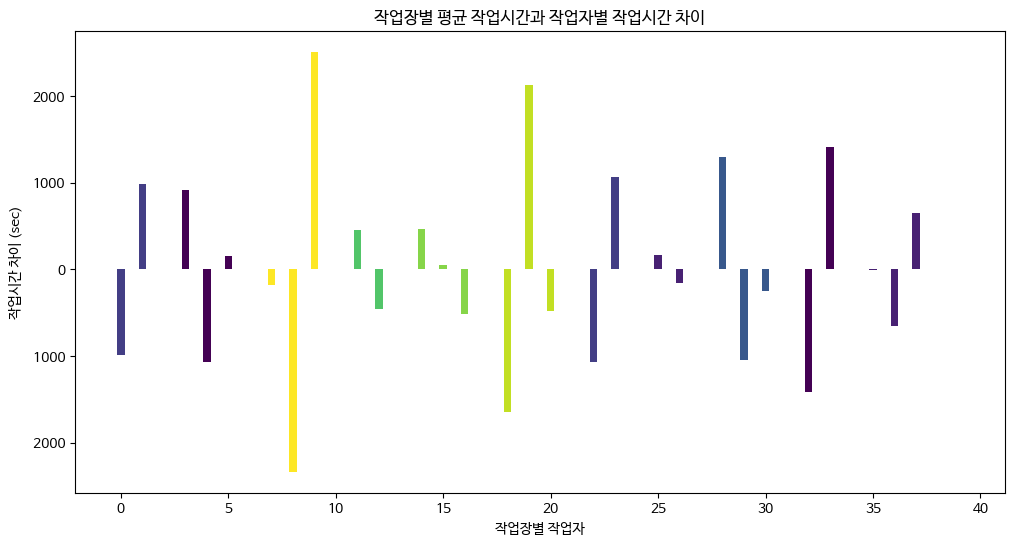

In [22]:
def visualize_mean_time_and_differences(assignments_by_x7, workloads_by_x7):
    plt.figure(figsize=(12, 6))
    plt.gca().set_facecolor('white')
    plt.gcf().set_facecolor('white')

    bar_width = 0.35
    index = 0  # X축 위치를 위한 인덱스
    colors = plt.cm.viridis(np.linspace(0, 1, len(assignments_by_x7)))

    # 각 작업장별 평균 작업시간 및 작업시간 차이 계산
    for x7_value, workloads in workloads_by_x7.items():
        mean_time = np.mean(list(workloads.values()))
        time_differences = [workload - mean_time for workload in workloads.values()]

        # 차이 시각화
        x_positions = np.arange(len(workloads)) + index
        plt.bar(x_positions, time_differences, bar_width, color=colors[x7_value % len(colors)], label=f'X7: {x7_value}')

        # 다음 X7 그룹을 위한 인덱스 업데이트
        index += len(workloads) + 1

    # 그래프 설정
    plt.xlabel('작업장별 작업자')
    plt.ylabel('작업시간 차이 (sec)')
    plt.title('작업장별 평균 작업시간과 작업자별 작업시간 차이')
    plt.show()

# 시각화 함수 실행
visualize_mean_time_and_differences(assignments_by_x7, workloads_by_x7)


In [31]:
# sampled_dfs의 각 데이터프레임을 하나의 데이터프레임으로 결합
combined_sampled_df = pd.concat(sampled_dfs.values(), ignore_index=True)

# 결과 확인
combined_sampled_df

,X7,X8,Y1_Actual,Y2_Actual,Y1_Predicted,Y2_Predicted
0,14,1,614,539,650,522
1,14,0,573,383,572,408
2,14,1,524,592,565,625
3,14,0,531,530,554,553
4,14,0,555,269,551,270
...,...,...,...,...,...,...
259,97,24,729,439,727,441
260,97,25,715,225,719,236
261,97,24,721,590,714,584
262,97,25,670,833,713,826


In [32]:
df_actual[df_actual['X7'] == 25]['X8'].unique()

array([13, 14, 12])

In [33]:
combined_sampled_df[combined_sampled_df['X7'] == 25]['X8'].unique()

array([14, 13])

In [34]:
combined_sampled_df['X8'].nunique()

28

In [35]:
for value in unique_x7_values:
    subset_df = combined_sampled_df[combined_sampled_df['X7'] == value]
    total_work_time = subset_df['Y1_Predicted'] + subset_df['Y2_Predicted']
    total_work_time.sort_values(ascending=False, inplace=True)

    tasks = total_work_time.tolist()
    workers = subset_df['X8'].unique()

    assignments, workloads = min_max_allocation(tasks, workers)
    assignments_by_x7[value] = assignments
    workloads_by_x7[value] = workloads

# workers
subset_df = combined_sampled_df[combined_sampled_df['X7'] == 25]
subset_df['X8'].unique()

array([14, 13])

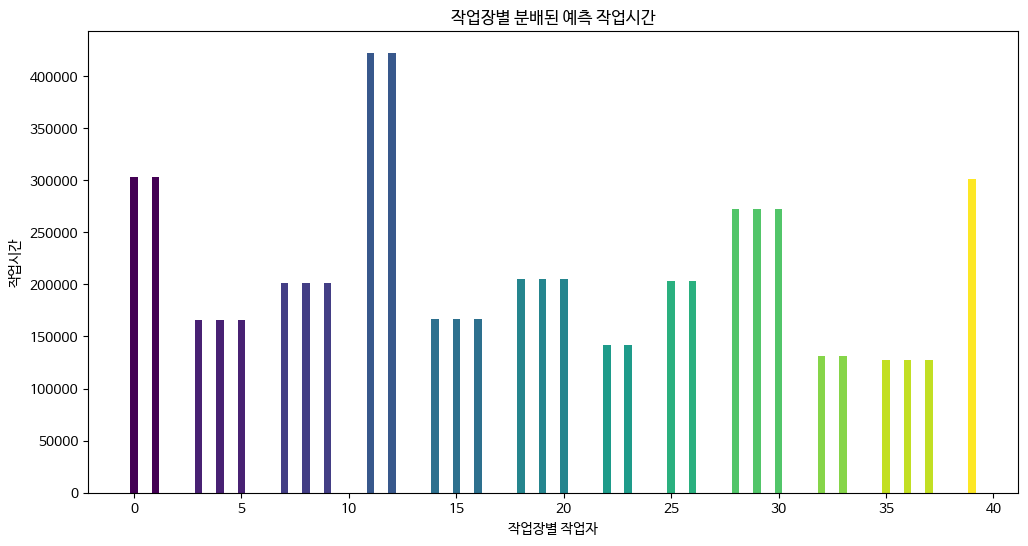

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = '/content/result.csv'
df_predicted = pd.read_csv(file_path)


# 각 작업자의 초기 작업량을 0으로 설정
def initialize_workloads(workers):
    return {worker: 0 for worker in workers}

# 각 작업을 최소 작업량을 가진 작업자에게 할당
def min_max_allocation(tasks, workers):
    workloads = initialize_workloads(workers)
    task_assignments = {worker: [] for worker in workers}
    for task in tasks:
        min_worker = min(workloads, key=workloads.get)
        task_assignments[min_worker].append(task)
        workloads[min_worker] += task

    return task_assignments, workloads

# X7 변수에 따라 데이터프레임을 분할하고 min_max_allocation 실행
unique_x7_values = df_predicted['X7'].unique()
assignments_by_x7 = {}
workloads_by_x7 = {}

for value in unique_x7_values:
    subset_df = df_predicted[df_predicted['X7'] == value]
    total_work_time = subset_df['Y1_Predicted'] + subset_df['Y2_Predicted']
    total_work_time.sort_values(ascending=False, inplace=True)

    tasks = total_work_time.tolist()
    workers = subset_df['X8'].unique()

    assignments, workloads = min_max_allocation(tasks, workers)
    assignments_by_x7[value] = assignments
    workloads_by_x7[value] = workloads
assignments


# assignments_by_x7과 workloads_by_x7에는 X7의 각 값에 대한 할당과 작업량이 저장됨


# 색상 팔레트 정의 (X7 값의 수에 따라 조정할 수 있음)
colors = plt.cm.viridis(np.linspace(0, 1, len(assignments_by_x7)))

# 그래프 준비
# 각 X7 값에 대한 바 차트를 그리기
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

bar_width = 0.35
index = 0  # X축 위치를 위한 인덱스
x_labels = []  # X축 라벨을 위한 리스트

for i, (x7_value, assignments) in enumerate(assignments_by_x7.items()):
    workloads = {worker: sum(tasks) for worker, tasks in assignments.items()}
    workers = list(workloads.keys())
    workload_values = list(workloads.values())

    # X축 위치 계산
    x_positions = np.arange(len(workers)) + index
    plt.bar(x_positions, workload_values, bar_width, color=colors[i], label=f'X7: {x7_value}')

    # X축 라벨 추가
    x_labels.extend([f'{x7_value}-{worker}' for worker in workers])

    # 다음 X7 그룹을 위한 인덱스 업데이트
    index += len(workers) + 1  # 그룹 사이에 간격 추가

# 그래프 설정
plt.xlabel('작업장별 작업자')
plt.ylabel('작업시간')
plt.title('작업장별 분배된 예측 작업시간')
plt.show()

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# CSV 파일 로드
file_path = '/content/result.csv'
df = pd.read_csv(file_path)

# 각 작업자의 초기 작업량을 0으로 설정
def initialize_workloads(workers):
    return {worker: 0 for worker in workers}

# 각 작업을 최대 작업시간을 초과하지 않는 범위에서 최소 작업량을 가진 작업자에게 할당
def min_max_allocation_with_limit(tasks, workers):
    workloads = initialize_workloads(workers)
    task_assignments = {worker: [] for worker in workers}
    for task in tasks:
        # 가능한 작업자 중 최소 작업량을 가진 작업자 찾기
        possible_workers = [worker for worker in workers if workloads[worker] + task <= MAX_WORK_TIME]
        if not possible_workers:
            continue  # 모든 작업자가 최대 작업시간에 도달한 경우, 이 작업은 할당하지 않음
        min_worker = min(possible_workers, key=workloads.get)
        task_assignments[min_worker].append(task)
        workloads[min_worker] += task

    return task_assignments, workloads

# 전체 작업 시간 계산
total_work_time = df['Y1_Predicted'] + df['Y2_Predicted']
total_work_time.sort_values(ascending=False, inplace=True)

tasks = total_work_time.tolist()
workers = df['X8'].unique()

# 각 작업자의 최대 작업시간 설정
MAX_WORK_TIME = 835200 // len(workers)  # 총 작업시간을 작업자 수로 나누어 균등하게 분배

# X7 변수를 제거하고 전체 데이터셋에 대해 작업 할당 실행
total_work_time = df_predicted['Y1_Actual'] + df_predicted['Y2_Actual']
total_work_time.sort_values(ascending=False, inplace=True)

assignments, workloads = min_max_allocation_with_limit(tasks, workers)



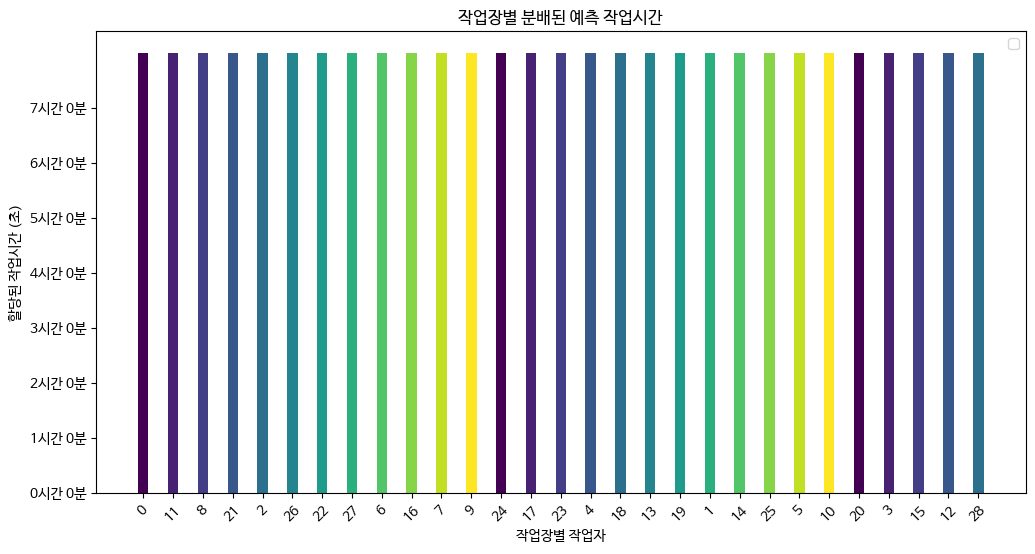

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# 원본 코드에서 제공된 assignments 변수를 사용
# assignments = { ... } # 이전 단계에서 계산된 작업 할당

# 작업자별 할당된 작업시간을 계산
workloads = {worker: sum(tasks) for worker, tasks in assignments.items()}
workers = list(workloads.keys())
workload_values = list(workloads.values())

# 색상 팔레트 정의 (X7 값의 수에 따라 조정 가능)
colors = plt.cm.viridis(np.linspace(0, 1, len(assignments_by_x7)))

# 그래프 준비
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

bar_width = 0.35
x_positions = np.arange(len(workers))  # X축 위치를 위한 인덱스

# 막대 그래프 그리기
for i, worker in enumerate(workers):
    plt.bar(x_positions[i], workload_values[i], bar_width, color=colors[i % len(colors)])

# 그래프 설정
plt.xticks(x_positions, workers, rotation=45)
plt.xlabel('작업장별 작업자')
plt.ylabel('할당된 작업시간 (초)')

# 작업시간을 시간:분 형태로 변환하는 함수
def seconds_to_hour_min(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return f"{hours}시간 {minutes}분"

# Y축 레이블을 시간:분 형태로 변환
# 레이블 변환 로직 수정
y_positions = np.arange(0, max(workload_values), 3600)  # 예: 3600초 간격으로 y축 위치 설정
y_labels = [seconds_to_hour_min(y) for y in y_positions]
plt.yticks(y_positions, y_labels)

plt.title('작업장별 분배된 예측 작업시간')
plt.legend()
plt.show()


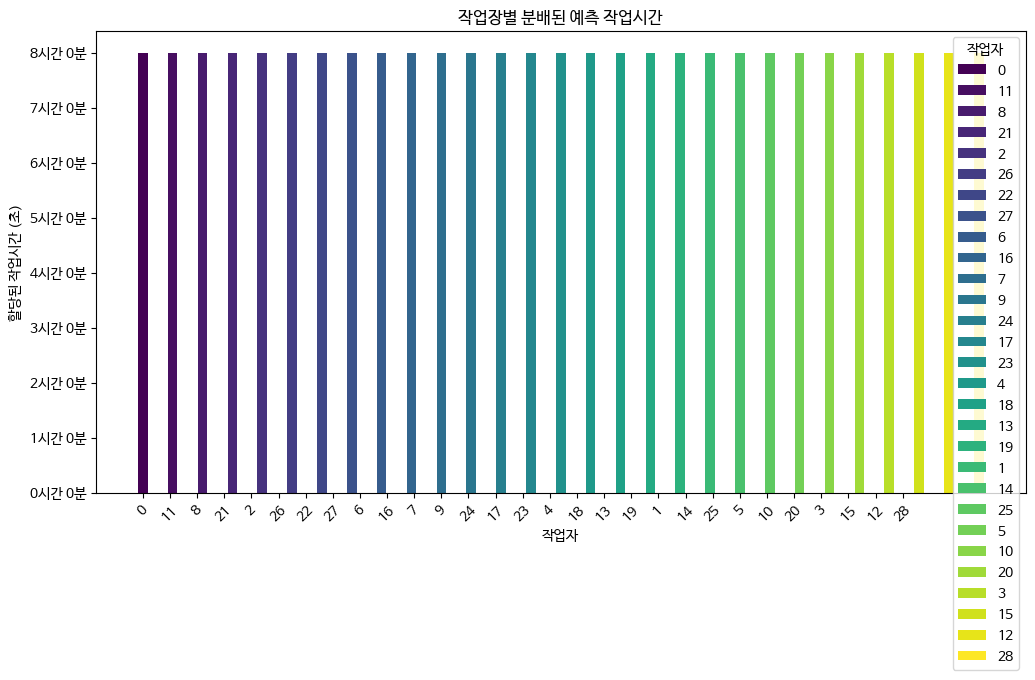

In [67]:
import matplotlib.pyplot as plt
import numpy as np


# 작업장별로 데이터를 그룹화하고, 각 그룹에 대한 인덱스 생성
# 이 예시에서는 모든 데이터가 같은 작업장에 속한다고 가정합니다.
# 실제 사용 시에는 작업장별로 데이터를 분리하여 관리해야 합니다.

# 색상 팔레트 정의
colors = plt.cm.viridis(np.linspace(0, 1, len(workers)))

# 그래프 준비
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

bar_width = 0.35
index = 0  # X축 위치를 위한 초기 인덱스

# 막대 그래프 그리기
for i, worker in enumerate(workers):
    plt.bar(index, workload_values[i], bar_width, color=colors[i % len(colors)], label=worker)
    index += 1 + 0.1  # 다음 바를 위한 인덱스 업데이트, 0.1은 바 사이의 간격

# 그래프 설정
plt.xticks(range(len(workers)), workers, rotation=45)
plt.xlabel('작업자')
plt.ylabel('할당된 작업시간 (초)')

# 작업시간을 시간:분 형태로 변환하는 함수
def seconds_to_hour_min(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return f"{hours}시간 {minutes}분"

# Y축 레이블을 시간:분 형태로 변환
y_positions = np.arange(0, max(workload_values) + 1, 3600)  # 3600초 간격으로 y축 위치 설정, 최대값에 +1 하여 범위 보정
y_labels = [seconds_to_hour_min(y) for y in y_positions]
plt.yticks(y_positions, y_labels)

plt.title('작업장별 분배된 예측 작업시간')
plt.legend(title='작업자')
plt.show()
